In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [125]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


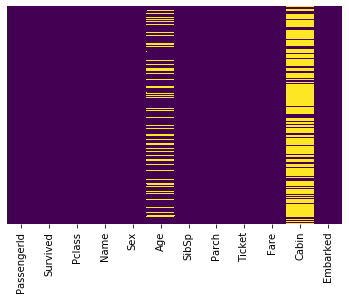

In [127]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

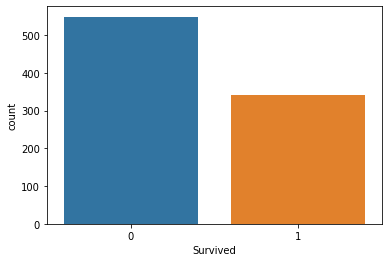

In [128]:
sns.countplot(x='Survived', data=train)

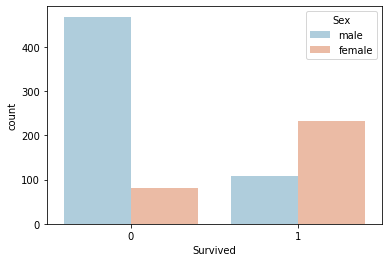

In [129]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

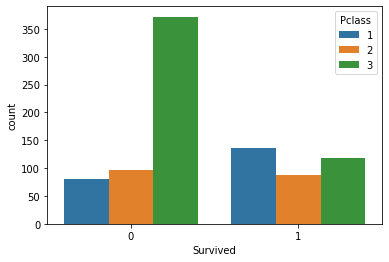

In [130]:
sns.countplot(x='Survived',hue='Pclass',data=train)

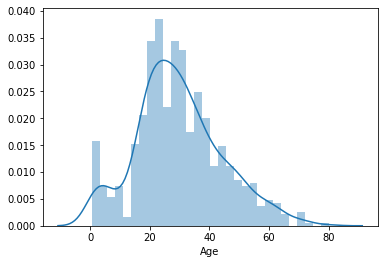

In [131]:
sns.distplot(train['Age'].dropna(),kde=True,bins=30)

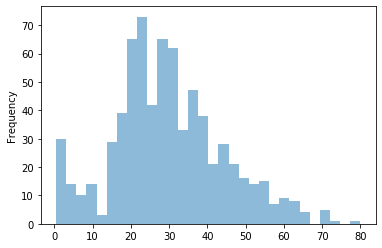

In [132]:
train['Age'].plot.hist(bins=30,alpha=0.5)

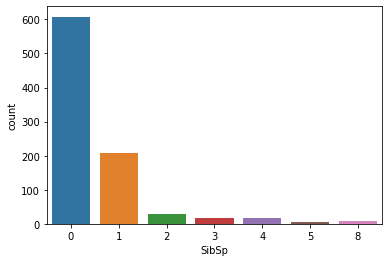

In [133]:
# SibSp -- No. of Siblings or spouse onboard

sns.countplot(train['SibSp'])

Most people doesnot have children or spouse or siblings onboard

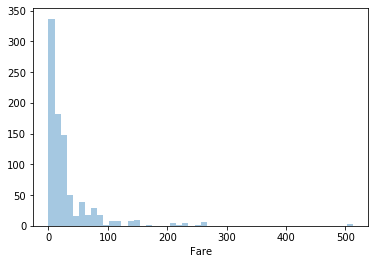

In [134]:
#Fare
sns.distplot(train['Fare'],kde=False)

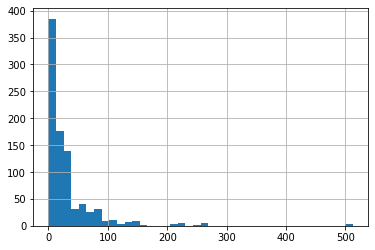

In [135]:
#another plotting
train['Fare'].hist(bins=40)

In [136]:
import cufflinks as cf

In [137]:
cf.go_offline()

In [138]:
#train['Fare'].iplot(kind='hist',bins=40)

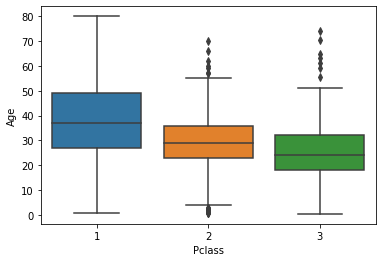

In [139]:
#Avg age by passenger class
sns.boxplot(x='Pclass',y='Age',data=train)

Average age of the passengers in the first class higher than second and third class

In [140]:
# Filling the Missing Data or Imputation
# 1. Age

In [141]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [142]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

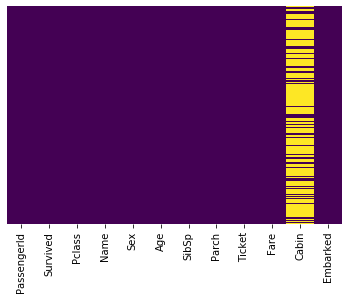

In [143]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [144]:
#2 Cabin

In [145]:
#Right now we are dropping as lot of info is missing

In [146]:
train.drop('Cabin',axis=1,inplace=True)

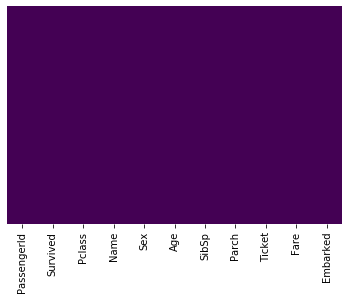

In [147]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [148]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [149]:
# Changing the categorical feature to numerical values

In [150]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


As 2 cols are created we will remove one col one column here is a perfect predictor of the other column

meaning if our machine learning algorithm gets fed both columns the machine learning algorithm will

immediately know that hey if it's zero female I can predict perfectly that it's going to be one male

and this is going to be an issue known as multi-collinearity and it basically will mess up the algorithm

because a bunch of calls will be perfect predictors of a another column in order to avoid this.

What you do is as another argument here you go ahead and say drop first equals true and then it will

go ahead and drop the first column.

And now this is exactly what you want to feed in to your machine learning algorithm as a column.

In [151]:
Sex = pd.get_dummies(train['Sex'],drop_first=True)

In [152]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [153]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [154]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [155]:
train_num = pd.concat([train,Sex,embark],axis=1)

In [156]:
train_num.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [157]:
# Age and Embaarked will be removed are there other col like male,Q,S
# we can do feature enginering the other features

In [158]:
train_num.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [159]:
train_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [160]:
# drop Passenger id
train_num.drop('PassengerId',axis=1,inplace=True)

In [161]:
train_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


 do pd.dummies on PClass -- after modelling, so will know the diff how model works with a catergirical and how it works with numrical

In [162]:
# Train and Predict the model for survival of the passenger
# Train test split
X = train_num.drop('Survived',axis=1)
y = train_num['Survived']

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [165]:
from sklearn.linear_model import LogisticRegression

In [166]:
model = LogisticRegression()

In [170]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [171]:
predictions = model.predict(X_test)

In [174]:
from sklearn.metrics import classification_report

In [175]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [176]:
from sklearn.metrics import confusion_matrix

In [177]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 38,  76]], dtype=int64)